In [5]:
import numpy as np
import pandas as pd

In [43]:

import pandas as pd
import mysql.connector
import os



    


In [7]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

conn = mysql.connector.connect(
                             host='127.0.0.1',
                             user='root',
                             password='Navneet@5656',
                             database='ecommerce'
)
cursor = conn.cursor()


# list all unique cities where custemor are located.

In [10]:
query=""" select distinct(customer_city) from customers"""
cursor.execute(query)

data=cursor.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# count number of order placed in 2017


In [11]:
query=""" select count(order_id) from orders where year(order_purchase_timestamp)= 2017"""
cursor.execute(query)

data=cursor.fetchall()

data[0]

(45101,)

# Find total sales per category


In [12]:
query=""" select( products.product_category) as category ,sum(payments.payment_value) sales
from products join order_items
on products.product_id =order_items.product_id
join payments on payments.order_id = order_items.order_id
group by product_category"""
cursor.execute(query)

data=cursor.fetchall()

data

[('perfumery', 506738.6600000037),
 ('Furniture Decoration', 1430176.3899999997),
 ('telephony', 486882.0500000097),
 ('bed table bath', 1712553.6700000048),
 ('automotive', 852294.3300000005),
 ('computer accessories', 1585330.4500000032),
 ('housewares', 1094758.1299999973),
 ('babies', 537884.6599999988),
 ('toys', 619037.6899999997),
 ('Furniture office', 646826.4900000006),
 ('Cool Stuff', 779697.9999999983),
 ('HEALTH BEAUTY', 1657373.1200000094),
 ('pet Shop', 311268.9699999997),
 ('General Interest Books', 64694.75999999999),
 ('stationary store', 317440.07000000135),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55000000005),
 ('climatization', 91170.66000000003),
 ('Construction Tools Construction', 241475.6299999998),
 ('sport leisure', 1392127.5600000073),
 ('Bags Accessories', 187151.28999999998),
 ('electronics', 259857.10000000164),
 ('Casa Construcao', 136645.29000000012),
 ('Fashion Bags and Accessories', 218158.27999999985),
 ('home appliances', 95532.27000000003)

# Calculate the percentage of orders that were paid in installments.

In [13]:
query=""" select sum(case when payment_installments > 1 then 1 else 0 end)/count(*)*100
from payments
"""
cursor.execute(query)

data=cursor.fetchall()

data

[(Decimal('49.4176'),)]

# Count the number of of custmer of each state.

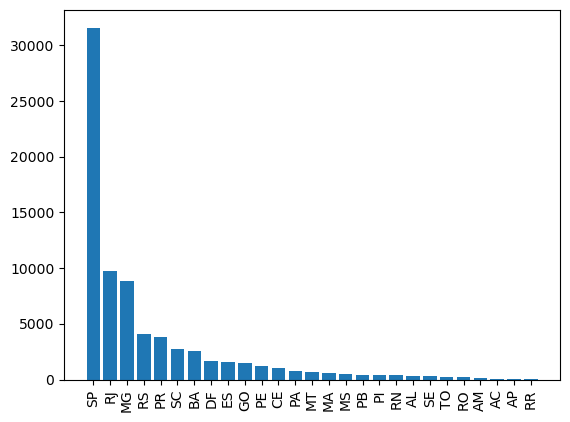

In [14]:
query=""" select customer_state,count(customer_id) from customers
group by customer_state """
cursor.execute(query)

data=cursor.fetchall()

df=pd.DataFrame(data ,columns=["state","customer_number"])
df=df.sort_values(by='customer_number',ascending=False)
plt.xticks(rotation=90)
plt.bar(df['state'],df['customer_number'])
plt.show()

# Calculate number of orders per month in 2018.

<function matplotlib.pyplot.show(close=None, block=None)>

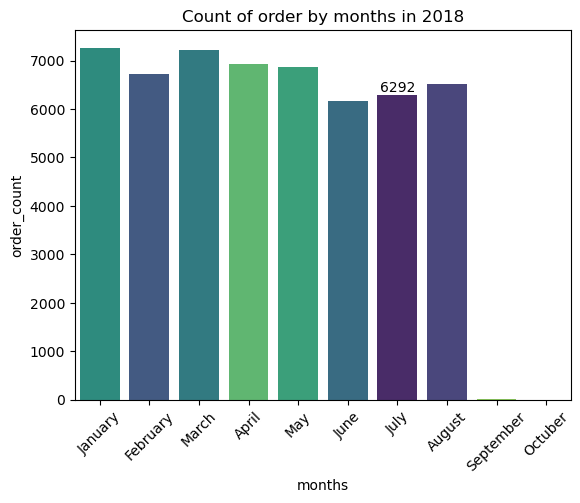

In [15]:
query=""" select monthname(order_purchase_timestamp) months,count(order_id) order_count
from orders where year(order_purchase_timestamp)=2018
group by months"""
cursor.execute(query)

data=cursor.fetchall()


df=pd.DataFrame(data,columns=['months' ,'order_count'])
df.set_index('months')
o=['January','February','March','April','May','June','July','August','September','Octuber']
ax=sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o,hue =df['months'],palette='viridis')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title('Count of order by months in 2018')
plt.show

# Find the average number of products per order, group by customer city.

In [16]:
query="""with count_per_order as (select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id =order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2)  from
customers join count_per_order on customers.customer_id = count_per_order.customer_id
group by customers.customer_city;
"""



cursor.execute(query)

data=cursor.fetchall()
data
df=pd.DataFrame(data,columns=['customer_city','Avg_count_order'])
df

,customer_city,Avg_count_order
0,sao paulo,1.16
1,sao jose dos campos,1.13
2,porto alegre,1.17
3,indaial,1.18
4,treze tilias,1.11
...,...,...
3779,sebastiao leal,1.00
3780,buriti,3.00
3781,morro agudo de goias,1.00
3782,santa filomena,1.00


# Calculate the percentage of total revenue  contributed by each product category.

In [17]:
query="""select products.product_category , round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from payments join order_items
on payments.order_id = order_items.order_id join products
on products.product_id = order_items.product_id
group by product_category order by sales_percentage;
"""



cursor.execute(query)

data=cursor.fetchall()
data
df=pd.DataFrame(data,columns=['product_category','sales_percentage'])
df

,product_category,sales_percentage
0,Fashion Children's Clothing,0.00
1,insurance and services,0.00
2,House Comfort 2,0.01
3,PC Gamer,0.01
4,flowers,0.01
...,...,...
68,Watches present,8.93
69,Furniture Decoration,8.93
70,computer accessories,9.90
71,HEALTH BEAUTY,10.35


# Identify the correlation between product and price and the numbers of times a product has been purchased.

In [18]:
query=""" select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id =order_items.product_id
group by products.product_category
"""
cursor.execute(query)

data=cursor.fetchall()
data
df=pd.DataFrame(data,columns=['product_category','order_count','price'])
df

arr1=df['order_count']
arr2=df['price']
a=np.corrcoef([arr1,arr2])
print('The relation between price and numbers of times a product has been purchased',a)

The relation between price and numbers of times a product has been purchased [[ 1.         -0.10628612]
 [-0.10628612  1.        ]]


# Calculate the total revenue generated by each seller, and rank then by revenue.

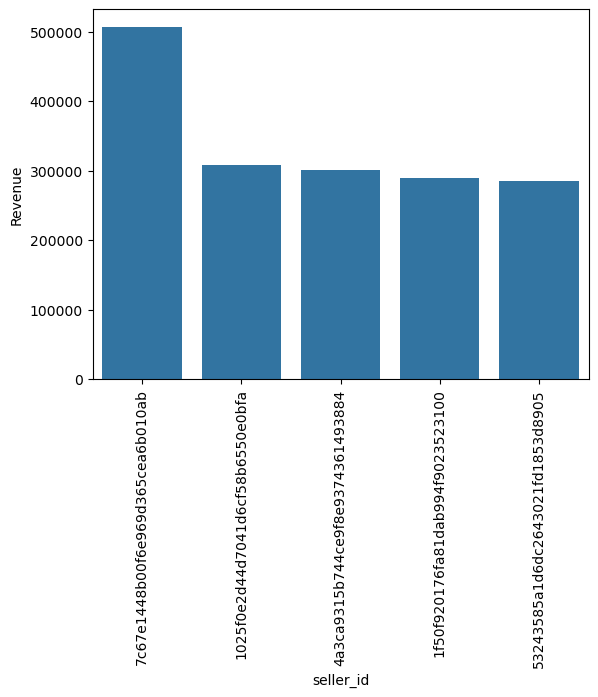

In [19]:
query="""select * ,dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id,round(sum(payments.payment_value),2) revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a
 """


cursor.execute(query)

data=cursor.fetchall()
data
df=pd.DataFrame(data,columns=['seller_id','Revenue','Rank'])
df=df.head()
sns.barplot(x='seller_id',y='Revenue',data=df)
plt.xticks(rotation =90)
plt.show()

#  Calculate the moving average of orders values of each customer over their order history.

In [20]:
query="""select customer_id, order_purchase_timestamp,payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from orders join payments 
on orders.order_id = payments.order_id) as a;"""



cursor.execute(query)

data=cursor.fetchall()
data
df=pd.DataFrame(data,columns=[' customer_id','order_purchase_timestamp','payment','mov_avg'])
df.head()

,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.01


# Calculate cumulative sales per month for each year.

In [38]:
query=""" select years,months ,payment,sum(payment)
over(order by years,months) cumulative_sales from
(select year(orders.order_purchase_timestamp)as years,
month(orders.order_purchase_timestamp)as months,
round(sum(payments.payment_value),2) as payment from
orders join payments on orders.order_id =payments.order_id
group by years, months order by years, months) as a"""



cursor.execute(query)

data=cursor.fetchall()
data
df=pd.DataFrame(data,columns=['Years','Months','payment','Cumulative_sales'])
df.head()

,Years,Months,payment,Cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
